# PROJECT BIG DATA: GROUP 19: CLIMATE CHANGE

In [2]:
# import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# read all csv into df
df = pd.read_csv("data/owid-co2-data.csv")
# df = df[(df['year']>=2000 )&(df['year']<=2019 ) ]
df = df[(df['year']>=2000)]
df.shape
# external resource
energy = pd.read_csv("data/owid-energy-data.csv")
energy.shape
# energy = energy [(energy['year']>= 2000)& (energy['year']<=2019)]
df_country= pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")


## 📑 Table of Contents

- [EDA](#eda)
  - [Data wrangling:](#data-wrangling)
    - [Quality checks:](#quality-checks)
    - [Clean the data](#clean-the-data)
- [Machine Learning models: For 3 main research questions:](#machine-learning-modaels-for-3-main-research-questions)
  - [ML: RQ: How accurately can a machine-learning model predict a country’s per-capita CO₂ emissions…?](#ml-rq-how-accurately-can-a-machine-learning-model-predict-a-countrys-per-capita-co₂-emissions)
    - [Preprocessing data](#preprocessing-data)
    - [Scaling the data by normalization](#scaling-the-data-by-normalization)
    - [Ridge Regression: (With hypertuning to find α)](#ridge-regression-with-hypertuning-to-find-α)
    - [Random Forest (Hypertuning parameters)](#random-forest-hypertuning-parameters)
    - [XGB Regressor + Hypertuning parameters](#xgb-regressor--hypertuning-parameters)
    - [Gradient Boosting Regressor + Hypertuning parameters](#gradient-boosting-regressor--hypertuning-parameters)
    - [K-Fold Cross-Validation for all models](#k-fold-cross-validation-for-all-models)
  - [ML: RQ: How significant is the relationship between latitude and temperature and can latitude be used to accurately predict temperatures?](#ml-rq-how-significant-is-the-relationship-between-latitude-and-temperature-and-can-latitude-be-used-to-accurately-predict-temperatures)
  - [Cleaning data](#cleaning-data)
  - [Visualizing temperature trends](#visualizing-temperature-trends)
  - [Correlation matrix](#correlation-matrix)
  - [Regression models - latitude only](#regression-models-latitude-only)
  - [Regression models - laitutde + longitude](#regression-models-latitude-longitude)
  - [Hexbin plot - Actual vs Predicted](#hexbin-plot)

# EDA

### Data wrangling:

In [73]:
df_country.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


In [74]:
df_country.tail(3)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [75]:
df.head(3)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
250,Afghanistan,2000,AFG,20130334.0,1.128379e+10,0.010,0.001,1.047,-0.045,-4.078,...,NaN,0.081,0.0,0.0,0.001,0.0,16.955,4.521,NaN,NaN
251,Afghanistan,2001,AFG,20284303.0,1.102127e+10,0.007,0.000,1.069,0.022,2.098,...,NaN,0.079,0.0,0.0,0.001,0.0,15.772,4.670,NaN,NaN
252,Afghanistan,2002,AFG,21378123.0,1.880487e+10,0.011,0.001,1.341,0.272,25.432,...,NaN,0.079,0.0,0.0,0.001,0.0,20.735,5.132,NaN,NaN


In [76]:
df.tail(3)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018
50190,Zimbabwe,2023,ZWE,16340829.0,NaN,0.531,0.032,11.164,0.739,7.090,...,NaN,0.102,0.001,0.001,0.002,0.0,33.955,18.608,NaN,NaN


In [77]:
energy.head(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [78]:
energy.tail(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21972,Zimbabwe,2021,ZWE,15797165.0,2.514009e+10,NaN,NaN,NaN,NaN,6.963,...,0.233,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21973,Zimbabwe,2022,ZWE,16069010.0,2.590159e+10,NaN,NaN,NaN,NaN,6.845,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21974,Zimbabwe,2023,ZWE,16340778.0,NaN,NaN,NaN,NaN,NaN,7.344,...,0.361,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [79]:
print(df_country.describe(include = "all"))
print(df.describe(include = 'all'))
print(energy.describe(include = 'all'))

                dt  AverageTemperature  AverageTemperatureUncertainty Country
count       577462       544811.000000                  545550.000000  577462
unique        3239                 NaN                            NaN     243
top     2013-09-01                 NaN                            NaN   Åland
freq           243                 NaN                            NaN    3239
mean           NaN           17.193354                       1.019057     NaN
std            NaN           10.953966                       1.201930     NaN
min            NaN          -37.658000                       0.052000     NaN
25%            NaN           10.025000                       0.323000     NaN
50%            NaN           20.901000                       0.571000     NaN
75%            NaN           25.814000                       1.206000     NaN
max            NaN           38.842000                      15.003000     NaN
            country         year iso_code    population         

#### Quality checks:

In [80]:
print(df_country.shape)
print("Total countries:", df_country['Country'].nunique())
print("Total months:", df_country['dt'].nunique())

print(df.shape)
print(energy.shape)

(577462, 4)
Total countries: 243
Total months: 3239
(6120, 79)
(21975, 130)


 `drop records`** reasonable to restrict the analysis to data from **1900 onward**(significantly reduces the sparsity and improves data reliability.


In [81]:
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country_clean = df_country[df_country['dt'].dt.year >=1900]
df_country_clean

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1874,1900-01-01,-3.026,0.538,Åland
1875,1900-02-01,-8.063,0.657,Åland
1876,1900-03-01,-3.196,0.467,Åland
1877,1900-04-01,0.781,0.224,Åland
1878,1900-05-01,4.960,0.503,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


#### Clean the data

In [82]:
df = df.dropna(axis = 1,
                   thresh=int(len(df) * 0.3)  
)


In [83]:

energy = energy.dropna(subset = ['iso_code'])
energy['iso_code'].isnull().sum()


0

In [84]:
energy[['renewables_consumption', 'primary_energy_consumption']].corr(method='pearson')


,renewables_consumption,primary_energy_consumption
renewables_consumption,1.000000,0.828609
primary_energy_consumption,0.828609,1.000000


### EDA: `df_country`:

In [85]:
### a general function: choropleth map: better to see whether the data is well-cleaning or not.
def plot_country_choropleth(df, country_col='Country', value_col=None, aggfunc='count',title='Choropleth Map by Country', color_scale='viridis'):
    """
    Creates a choropleth map using Plotly based on country-level data.
    """
    if value_col:
        df_agg = df.groupby(country_col)[value_col].agg(aggfunc).reset_index()
        df_agg.columns = [country_col, 'Value']
    else:
        df_agg = df[country_col].value_counts().reset_index()
        df_agg.columns = [country_col, 'Value']

    fig = px.choropleth(df_agg, locations=country_col, locationmode='country names', color='Value',
        color_continuous_scale=color_scale, title=title
    )
    fig.update_layout(coloraxis_colorbar=dict(title='Value'),
        margin=dict(l=0, r=0, t=50, b=0))
    fig.show()

    # plot_country_choropleth(df_country,
                        # title='Number of Temperature Records by Country(All RECORDS)')

In [86]:
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country_clean = df_country[df_country['dt'].dt.year >=1900]
df_country_clean

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1874,1900-01-01,-3.026,0.538,Åland
1875,1900-02-01,-8.063,0.657,Åland
1876,1900-03-01,-3.196,0.467,Åland
1877,1900-04-01,0.781,0.224,Åland
1878,1900-05-01,4.960,0.503,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [87]:
df_country_clean.isnull().sum()

dt                                  0
AverageTemperature               1050
AverageTemperatureUncertainty     311
Country                             0
dtype: int64

Because this is a time-series dataset, filling the < 1 % temperature gaps with an overall mean

=> Safely remove the rows with missing value

In [88]:
df_country_clean = df_country_clean.dropna(subset=['AverageTemperature'])
# a choropleth map to show that the data are well-cleaning:
# plot_country_choropleth(df_country_clean,
#                         title='Number of Temperature Records by Country (from 1900)')

In [89]:
plot_country_choropleth(df_country_clean,
                        value_col= 'AverageTemperature',
                        aggfunc = 'mean',
                        title = 'Average Temperature of Countries')

#### RQ: What are the countries with minimum and maximum average temperature?

In [90]:
df_country_clean[df_country_clean['AverageTemperature']== df_country_clean['AverageTemperature'].min()]
df_country_clean[df_country_clean['AverageTemperature']== df_country_clean['AverageTemperature'].max()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait


In [91]:
def plot_kde_temperature_comparison(df, countries, year):
    """
    Plots KDE curves of average temperature for multiple countries in a given year.
    Parameters:
    - df: DataFrame with 'Country', 'dt', 'AverageTemperature'
    - countries: list of country names, e.g. ['Kuwait', 'Greenland']
    - year: int, e.g. 2012
    """
    df = df[df['Country'].isin(countries)].copy()
    df.dropna(subset=['AverageTemperature', 'dt'], inplace=True)
    df['dt'] = pd.to_datetime(df['dt'])
    df['year'] = df['dt'].dt.year
    df = df[df['year'] == year]
    custom_palette = {'Greenland': 'skyblue', 'Kuwait': 'orange'}

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df,
        x='AverageTemperature',
        hue='Country',
        palette=custom_palette,
        fill=True,
        common_norm=False,
        alpha=0.5,
        linewidth=2
    )
    plt.title(f'KDE of Average Temperature in {", ".join(countries)} ({year})')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()
    plot_kde_temperature_comparison(df_country_clean, ['Greenland', 'Kuwait'], 2012)


#### RQ: How has the average yearly temperature changed from 1900 to 2020?

C:\Users\Admin\AppData\Local\Temp\ipykernel_29352\318254535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



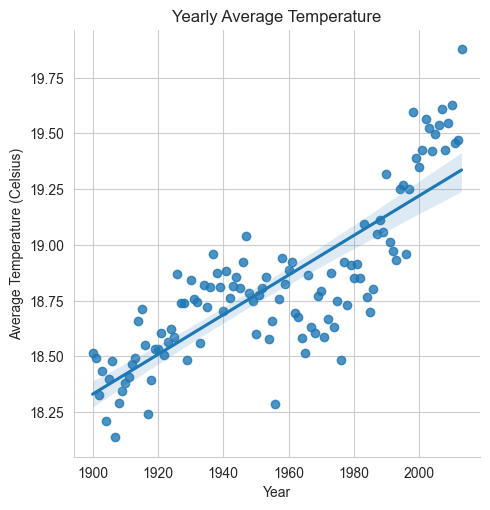

In [92]:
df_country_clean['Year'] = df_country_clean['dt'].dt.year
df_yearly_avg = df_country_clean.groupby('Year')['AverageTemperature'].mean().reset_index()

sns.lmplot(data=df_yearly_avg, x='Year', y='AverageTemperature', palette= 'viridis')
sns.set_style("whitegrid")
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celsius)')
plt.show()

The regression line in the plot **highlights a significant upward trend**, suggesting that the average temperature has steadily increased over the last century, consistent with **global warming patterns.**

### EDA for `df`(emissions):

In [93]:
# get rid of sparse
df_emissions = df[df['year']>=1900]
df_emissions.isnull().sum()


country                           0
year                              0
iso_code                        888
population                      600
gdp                            2338
                               ... 
temperature_change_from_n2o     840
total_ghg                       960
total_ghg_excluding_lucf        984
trade_co2                      2954
trade_co2_share                2954
Length: 74, dtype: int64

Handling the missing values: drop the columns contain >= 30% missing data points

In [94]:
df_emissions = df_emissions.dropna(
    axis=1,
    thresh=int(len(df_emissions) * 0.3)  
)
print(df_emissions.shape)
print(df_emissions.columns)


(6120, 74)
Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'energy_per_capita', 'energy_per_gdp',
       'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_cap

#### RQ: The correlation of co2 with economics and energy factors

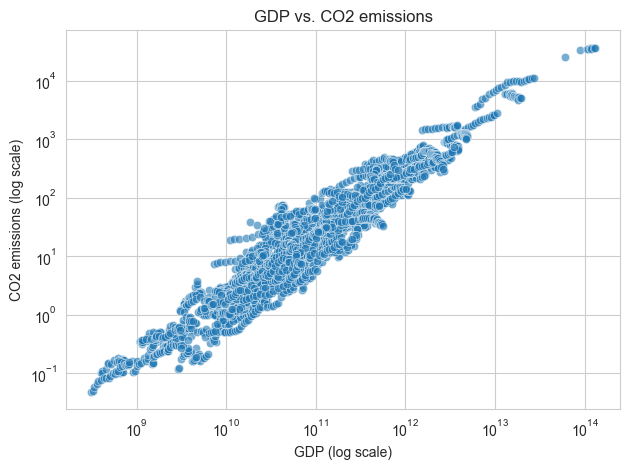

In [95]:
sns.scatterplot(data=df_emissions[['gdp','co2']].dropna(), x='gdp', y='co2', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP (log scale)')
plt.ylabel('CO2 emissions (log scale)')
plt.title('GDP vs. CO2 emissions')
plt.tight_layout()
plt.show()

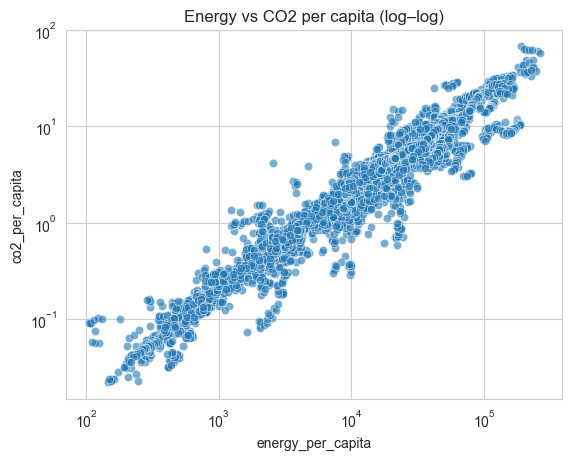

In [96]:
sns.scatterplot(data=df_emissions, x='energy_per_capita', y='co2_per_capita', alpha=0.6)
plt.xscale('log'); plt.yscale('log')
plt.title('Energy vs CO2 per capita (log–log)')
plt.show()

In [97]:
df_emissions['gdp_per_capita'] = df_emissions['gdp'] / df_emissions['population']

df_emissions['gdp_per_capita'] = df_emissions['gdp_per_capita'].round(3) 


df_emissions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
250,Afghanistan,2000,AFG,20130334.0,1.128379e+10,0.010,0.001,1.047,-0.045,-4.078,...,0.081,0.000,0.000,0.001,0.0,16.955,4.521,NaN,NaN,560.537
251,Afghanistan,2001,AFG,20284303.0,1.102127e+10,0.007,0.000,1.069,0.022,2.098,...,0.079,0.000,0.000,0.001,0.0,15.772,4.670,NaN,NaN,543.340
252,Afghanistan,2002,AFG,21378123.0,1.880487e+10,0.011,0.001,1.341,0.272,25.432,...,0.079,0.000,0.000,0.001,0.0,20.735,5.132,NaN,NaN,879.632
253,Afghanistan,2003,AFG,22733054.0,2.107434e+10,0.010,0.000,1.560,0.219,16.302,...,0.078,0.000,0.000,0.001,0.0,21.423,5.521,NaN,NaN,927.035
254,Afghanistan,2004,AFG,23560656.0,2.233257e+10,0.010,0.000,1.237,-0.322,-20.669,...,0.078,0.000,0.000,0.001,0.0,20.057,5.354,NaN,NaN,947.876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261,1646.637
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209,1492.811
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280,1591.425
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018,1611.892


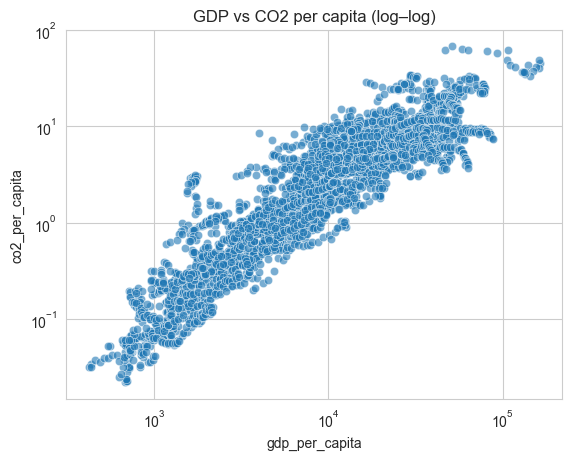

In [98]:
sns.scatterplot(data=df_emissions, x='gdp_per_capita', y='co2_per_capita', alpha = 0.6)
plt.xscale('log'); plt.yscale('log')
plt.title('GDP vs CO2 per capita (log–log)')
plt.show()

#### RQ: Which regions or economic blocs were the top $CO_2$ emitters in the most recent year, based on OWID aggregate groups?

In [99]:
def top_emitters(df,start, end, level,  metric="co2", top_n=5):
    """
    Return the top-N emitters for a given period.

    Parameters
    ----------
    df : pandas.DataFrame
        OWID / GCP emissions table. Must contain columns
        'year', 'country', 'iso_code', and the metric column.
    start_year, end_year : int
        Inclusive year boundaries (e.g. 2013, 2023).
    level : {"aggregate", "country"}
        aggregate – OWID/GCP group rows (iso_code is missing OR starts 'OWID_').
        country   – ISO-3166 alpha-3 rows only (len == 3, all A-Z).
    metric : str, default "co2"
        Column to sum.
    top_n : int, default 5
        How many rows to return.
    """

    df = df.copy()
    df.loc[df["iso_code"] == "", "iso_code"] = np.nan

    recent = df[(df["year"] >= start) & (df["year"] <= end)]

    
    if level == "country":
        mask = (recent["iso_code"].notna()
            & recent["iso_code"].str.fullmatch(r"[A-Z]{3}")
        )
    elif level == "aggregate":
        mask = pd.Series(True, index=recent.index)
    else:
        raise ValueError("level must be 'aggregate' or 'country'")

    subset = recent[mask]

    cumulative = (subset.groupby("country")[metric].sum()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
        .rename(columns={metric: f"cumulative_{metric}_{start}_{end}"}) )

    return cumulative

In [100]:
agg_top5 = top_emitters(df_emissions, 2013, 2023, level="aggregate")
print(agg_top5)
fig = px.bar(agg_top5, x="country", y="cumulative_co2_2013_2023", color="country",  
    text="cumulative_co2_2013_2023",  
    title="Cumulative CO2 Emissions (2013–2023) by Aggregation",
    labels={"cumulative_co2_2013_2023": "Cumulative CO2 (Mt)", "country": "Aggregation"},
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.show()

                         country  cumulative_co2_2013_2023
0                          World                398601.568
1                 Non-OECD (GCP)                252187.202
2                           Asia                223525.662
3                     Asia (GCP)                195011.016
4  Upper-middle-income countries                176459.532


c:\Users\Admin\anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### RQ: Which countries are the top emitters in the recent ten years? (2013-2023)

In [101]:
# Top 5 individual countries, 2013-2023
country_top5 = top_emitters(df_emissions, 2013, 2023, level="country")
print(country_top5)
fig = px.bar(
    country_top5,  
    x="country",
    y="cumulative_co2_2013_2023",
    color="country",  
    text="cumulative_co2_2013_2023",  
    title="Cumulative CO₂ Emissions (2013–2023) by Country",
    labels={"cumulative_co2_2013_2023": "Cumulative CO2 (Mt)", "country": "Country"},
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.show()

         country  cumulative_co2_2013_2023
0          China                116232.723
1  United States                 57227.450
2          India                 27354.136
3         Russia                 18600.639
4          Japan                 12564.790


c:\Users\Admin\anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### Temperature change from $CO_2$ by continents from 1950 to 2020:


In [102]:
# Filter only continent-level data
continents = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]
df_continents = df_emissions[
    df_emissions["country"].isin(continents) &
    df_emissions["temperature_change_from_co2"].notna()
]

# Optional: recent years only
df_continents = df_continents[df_continents["year"] >= 1950]

# Plot
fig = px.line(df_continents, x="year", y="temperature_change_from_co2", color="country",
              title="Temperature Change from CO₂ by Continent (1950–present)",
              labels={"country": "Continent", "temperature_change_from_co2": "Temp Change (°C)"})
fig.show()

c:\Users\Admin\anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### Average Temperature and $CO_2$ emissions through years

C:\Users\Admin\AppData\Local\Temp\ipykernel_29352\288892518.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_29352\288892518.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



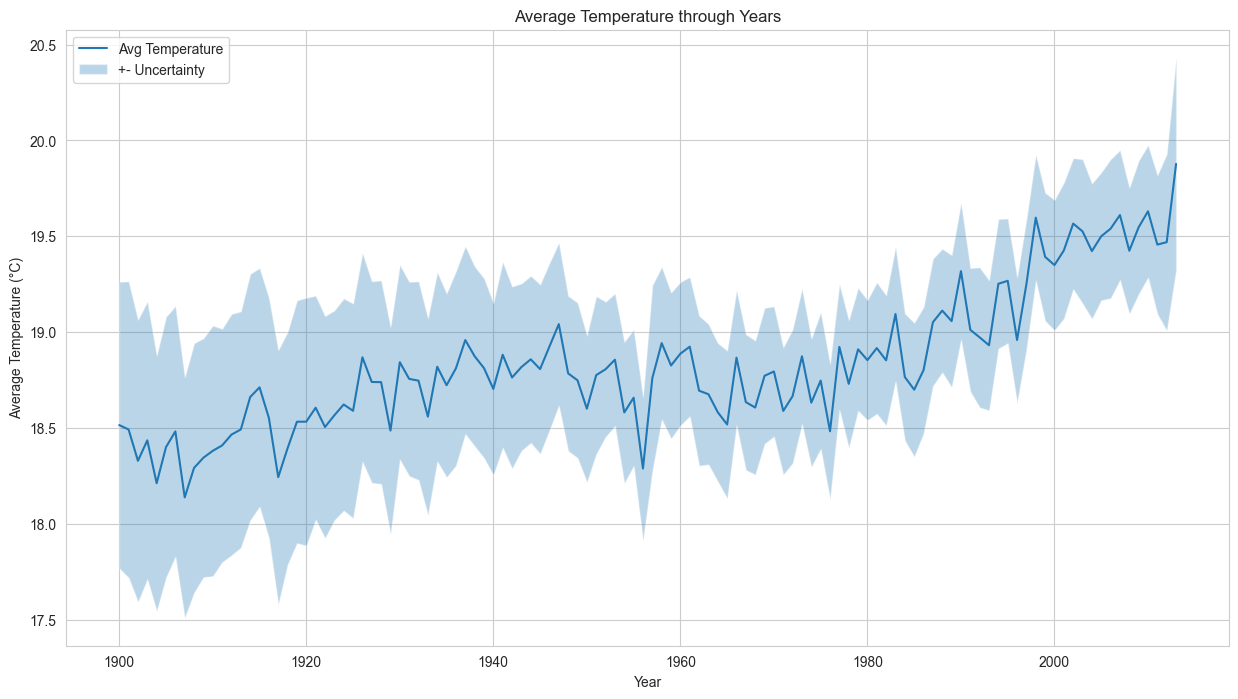

In [103]:
# 1. Ensure 'dt' is datetime
df_country_clean["dt"] = pd.to_datetime(df_country_clean["dt"])

# 2. Extract year
df_country_clean["year"] = df_country_clean["dt"].dt.year

# 3. Group by year and average both temperature and uncertainty
df_yearly = df_country_clean.groupby("year")[["AverageTemperature", "AverageTemperatureUncertainty"]].mean().reset_index()

# 4. Plot with confidence band
plt.figure(figsize=(15, 8))
sns.lineplot(
    x="year",
    y="AverageTemperature",
    data=df_yearly,
    label="Avg Temperature"
)
plt.fill_between(
    df_yearly["year"],
    df_yearly["AverageTemperature"] - df_yearly["AverageTemperatureUncertainty"],
    df_yearly["AverageTemperature"] + df_yearly["AverageTemperatureUncertainty"],
    alpha=0.3,
    label="+- Uncertainty"
)

plt.title("Average Temperature through Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()

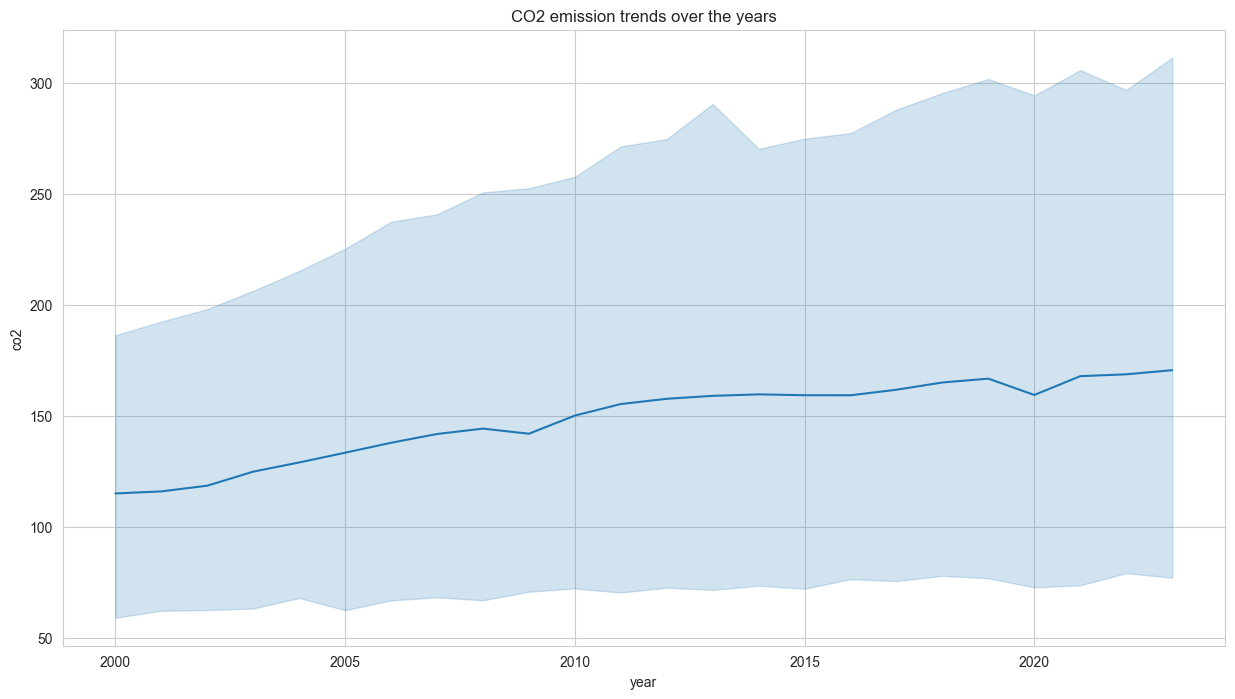

In [111]:
### CO2 emissions trends over the years
# Keep only the country no more aggregation
plt.figure(figsize = (15,8))
sns.lineplot(x="year", y="co2", data=df_emissions)
plt.title('CO2 emission trends over the years')
plt.show()

In [105]:
#### $CO_2$ emissions over time of top 5 emitters countries since 1990

In [106]:
selected_countries = ["China","Russia", "United States", "Japan", "India"]
df_filtered = df_emissions[
    (df_emissions["country"].isin(selected_countries)) &
    (df_emissions["co2"].notna())
]
fig = px.box(
    df_filtered[df_filtered["year"] >= 1990],
    x="country",
    y="co2",
    log_y=True,                 # compresses huge differences
    points='outliers',          # show only true outliers
    title="CO₂ Emissions Since 1990 (log scale)",
    labels={"co2": "CO₂ Emissions (million tonnes, log scale)"}
)
fig.show()

#### CO2 emission per capita trends over the years

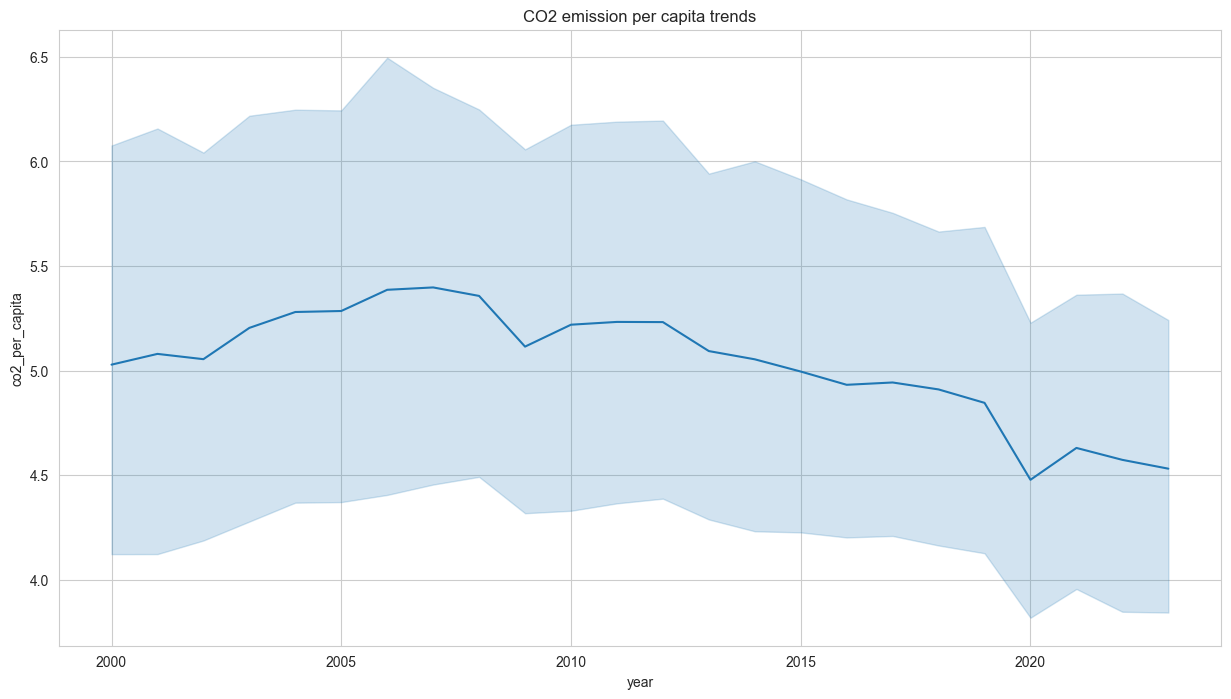

In [116]:
plt.figure(figsize = (15,8))
sns.lineplot(x="year", y="co2_per_capita", data=df)
plt.title('CO2 emission per capita trends')
plt.show()

## SDA: 

### Has the average annual temperature significantly increased when comparing the early 20th century to the early 21st century
- Testing hypothesis: 

    $H_0$: $\mu_{\text{early}} = \mu_{\text{recent}}$

    $H_a$: $\mu_{\text{early}} \ne \mu_{\text{recent}}$

#### Diagnostics plots and tests:


LinregressResult(slope=0.008897991393567816, intercept=1.4245474175166457, rvalue=0.8208769342226218, pvalue=5.157704860324023e-29, stderr=0.0005849529985536124, intercept_stderr=1.1446224150553486)


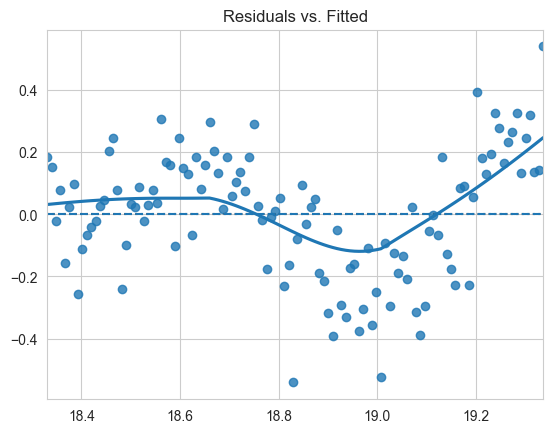

In [117]:
# Residuals vs Fitted plot
import statsmodels.api as sm
from scipy.stats import linregress

result = linregress(df_yearly_avg['Year'], df_yearly_avg['AverageTemperature'])
print(result)
# Fit model using statsmodels
X = df_yearly_avg['Year']
y = df_yearly_avg['AverageTemperature']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# 1. Residuals vs Fitted
residuals = model.resid
fitted = model.fittedvalues
sns.residplot(x=fitted, y=residuals, lowess=True)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs. Fitted')
plt.show()


In [118]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

Durbin-Watson statistic: 0.758


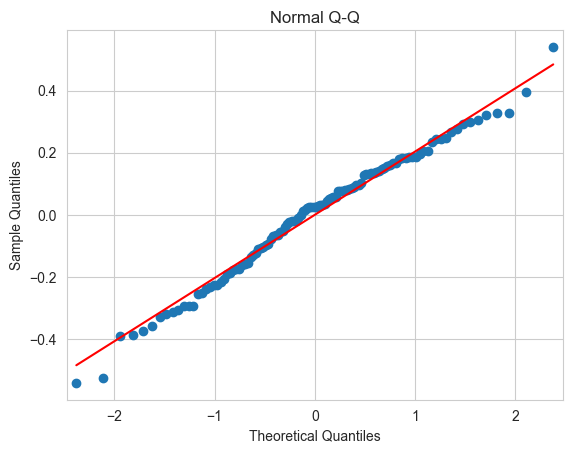

In [119]:
# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q')
plt.show()

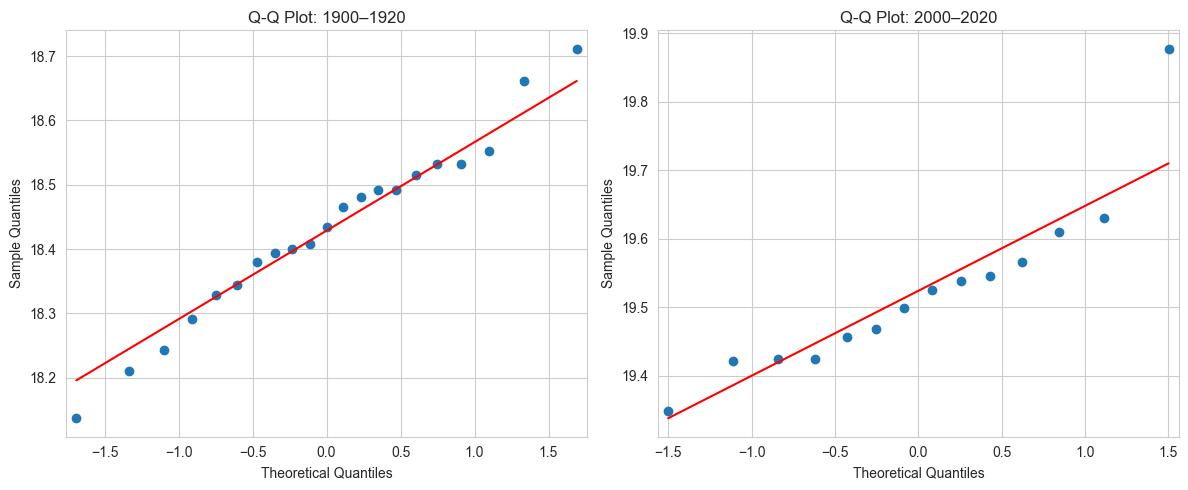

In [120]:
# Select relevant columns and drop NaNs
df_temp = df_yearly_avg[['Year', 'AverageTemperature']].dropna()

# Define periods
early = df_temp[(df_temp['Year'] >= 1900) & (df_temp['Year'] <= 1920)]['AverageTemperature']
recent = df_temp[(df_temp['Year'] >= 2000) & (df_temp['Year'] <= 2020)]['AverageTemperature']

# Create Q-Q plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.qqplot(early, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot: 1900–1920')

sm.qqplot(recent, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot: 2000–2020')

plt.tight_layout()
plt.show()

#### Testing process

In [121]:
from scipy.stats import ttest_ind
# 2-sample t-tests
early = df_yearly_avg[df_yearly_avg['Year'] < 1950]['AverageTemperature']
recent = df_yearly_avg[df_yearly_avg['Year'] >= 1950]['AverageTemperature']

t_stat, p_value = ttest_ind(early, recent, equal_var=False)  
print(f"t = {t_stat:.3f}, p-value = {p_value:.4e}")

t = -7.057, p-value = 1.8988e-10


Early Shapiro p = 0.978
Recent Shapiro p = 0.054
Levene p = 0.509
Welch t = -23.76, p = 6.561e-21


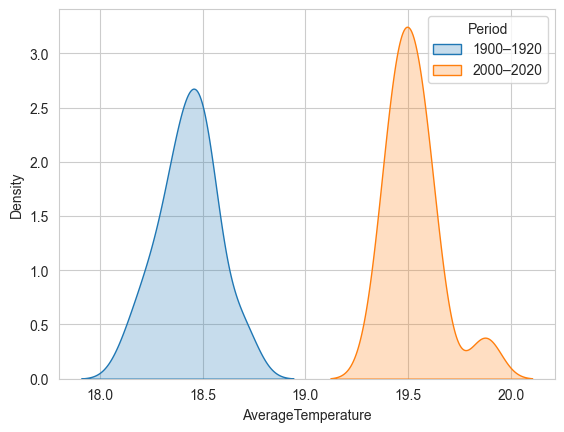

In [122]:
early = df_yearly_avg.query("1900 <= Year <= 1920").copy()
recent = df_yearly_avg.query("2000 <= Year <= 2020").copy()

early["Period"] = "1900–1920"
recent["Period"] = "2000–2020"
plot_df = pd.concat([early, recent], ignore_index=True)
sns.kdeplot(data=plot_df, x="AverageTemperature", hue="Period", fill=True, common_norm=False)

import scipy


early   = df_yearly_avg.query("Year.between(1900, 1920)")["AverageTemperature"]
recent  = df_yearly_avg.query("Year.between(2000, 2020)")["AverageTemperature"]
# Normality checks
for label, series in {"Early": early, "Recent": recent}.items():
    stat, p = scipy.stats.shapiro(series)
    print(f"{label} Shapiro p = {p:.3f}")

# Variance equality
levene_p = scipy.stats.levene(early, recent).pvalue
print(f"Levene p = {levene_p:.3f}")

# Welch two-sample t-test
t_stat, p_val = scipy.stats.ttest_ind(early, recent, equal_var=False)
print(f"Welch t = {t_stat:.2f}, p = {p_val:.3e}")


### SDA: Monika

## Machine Learning models: For 3 main research questions: 
- (Duncan)
- (Oscar)
- How accurately can a machine-learning model predict a country’s total CO₂ emissions from its share of renewable-energy consumption (and other socio-economic indicators)?

###  ML: RQ: How accurately can a machine-learning model predict a country’s total CO₂ emissions from its share of renewable-energy consumption (and other socio-economic indicators)?


#### Preprocessing data

In [ ]:
# Keep only the country no more aggregation
df = df.dropna(subset=['iso_code'])
# indicators = ['gdp', 'population', 'primary_energy_consumption','renewables_consumption', 'oil_consumption' ]
keys = ['country', 'year']
df_sub     = df[ keys + ['gdp', 'population', 'co2','primary_energy_consumption' ]]
energy_sub = energy[ keys + ['renewables_consumption','oil_consumption'] ]

merged = pd.merge(df_sub, energy_sub, on=keys, how='inner')
# Cook's distance
influential_countries = ['China', 'India', 'United States']

# Filter out these countries
merged = merged[~merged['country'].isin(influential_countries)]

merged


In [ ]:
#Drop sparse countries
core = ['gdp','population','primary_energy_consumption','co2']
coverage = (
    merged.assign(nonmiss=lambda d: d[core].notnull().all(axis=1))
      .groupby('country')['nonmiss'].mean()
)
keep = coverage[coverage >= 0.6].index
merged = merged[merged['country'].isin(keep)].copy()
# Imputation for other missing records per country
cols_to_impute = ['gdp', 'primary_energy_consumption','oil_consumption', 'renewables_consumption']
# 3. Per-country median imputation
merged[cols_to_impute] = merged.groupby('country')[cols_to_impute] \
                       .transform(lambda x: x.fillna(x.median()))
# fill 0 for oil_consumption, and renewable
merged['renewables_consumption'] = merged['renewables_consumption'].fillna(0)
merged['oil_consumption'] = merged['oil_consumption'].fillna(0)


In [ ]:
merged.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
merged['year'] = merged['year'].astype(int)
prediction_features = ['year', 'gdp','population','primary_energy_consumption','renewables_consumption','oil_consumption']
target = 'co2'
X = merged[prediction_features]
y = merged[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("\nFeature columns:", X_train.columns.tolist())


#### Scaling the data by normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Ridge Regression: (With hypertuning to find $\alpha$)

In [ ]:
### Finding alpha 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
alphas = np.linspace(0.01, 10, 50) 
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_root_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Best alpha:", ridge_cv.alpha_)

In [ ]:
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=X_train.columns[i])

plt.xlabel("Lambda")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients vs. Regularization Strength (lambda)")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
### Ridge:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import root_mean_squared_error
#Model
ridge = Ridge(alpha = 0.01 )
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
# Metrics performance
rmse = root_mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")

In [ ]:
#  1) Extract absolute coefficients and feature names
importance = np.abs(ridge.coef_)
feature_names = X_train.columns

df_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=True)  # ascending for horizontal bars

# 3) Plot
plt.barh(df_imp['feature'], df_imp['importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importances (Ridge Regression)')
plt.show()


In [ ]:
# 1) Actual vs Predicted
df1 = pd.DataFrame({
    'Actual CO2': y_test,
    'Predicted CO2': y_pred_ridge
})
fig1 = px.scatter(
    df1, x='Actual CO2', y='Predicted CO2',
    trendline='ols',
    trendline_color_override='black',
    labels={
      'Actual CO2':'Actual CO2 Emissions',
      'Predicted CO2':'Predicted CO2 Emissions'
    },
    title='Actual vs. Predicted CO2 Emissions'
)
fig1.show()


# 2) Residuals vs Fitted
residuals = y_test - y_pred_ridge
df2 = pd.DataFrame({
    'Fitted CO2': y_pred_ridge,
    'Residuals': residuals
})
fig2 = px.scatter(
    df2, x='Fitted CO2', y='Residuals',
    labels={
      'Fitted CO2':'Predicted (Fitted) CO2 of Ridge Regressions',
      'Residuals':'Residual'
    },
    title='Residuals vs. Fitted Values'
)
# add a horizontal zero‐error line
fig2.add_hline(y=0, line_dash='dash', line_color='black')
fig2.show()

#### Random Forest( Hypertuning parameters)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [ None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 0.5]
}

search = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train_scaled, y_train)

print("Best params:", search.best_params_)
best_rf = search.best_estimator_

In [ ]:
### Random Forest

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    n_jobs=-1,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features='sqrt'
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
# Metrics performance
rmse = root_mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")

# 2) Compute importances and their std across all trees
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# 3) Sort features by importance
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns




# 5) Plot with error bars
plt.figure(figsize=(8,6))
plt.title("Feature importances (with std)")
plt.bar(
    range(len(importances)),
    importances[indices],
    color="skyblue",
    yerr=std[indices],
    align="center"
)
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Mean importance")
plt.tight_layout()
plt.show()

#### XGB Regressor + Hypertuning parameters

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# XGBoost model
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,       # Lower learning rate for better generalization
    max_depth=5,
    reg_alpha=0.5,      # L1 regularization     
    reg_lambda=1.0,      # L2 regularzation    
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)

# Output
print(f"XGB RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")

#### Gradient Boosting Regressor + Hypertuning parameters

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor with similar parameters
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)

# Fit model
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate performance
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

# Compute feature importances
importances_gbr = gbr.feature_importances_
indices_gbr = np.argsort(importances_gbr)[::-1]
feature_names_gbr = X_train.columns
print(f" RMSE: {rmse_gbr:.3f}")
print(f"R²: {r2_gbr:.3f}")
print(f"MAE: {mae_gbr:.3f}")

#### K-Fold Cross-Validation for all models

In [ ]:
from sklearn.model_selection import cross_val_score
models = {'ridge': ridge, 'rf': rf, 'xgb': xgb, 'gbr': gbr}
cv_results = {}
for name, model in models.items():
    # 5-fold CV with R²
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)
    cv_results[name] = scores
    print(f"{name} R_squared scores: {scores}")
    print(f"{name} mean R_squared:   {scores.mean():.4f}\n")

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve_px(model, name):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train_scaled, y_train,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1
        )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    df = pd.DataFrame({
        'training_set_size': np.concatenate([train_sizes, train_sizes]),
        'r2_score':          np.concatenate([train_mean, val_mean]),
        'split':             ['train'] * len(train_sizes) + ['validation'] * len(train_sizes)
    })

    fig = px.line(
        df, x='training_set_size',y='r2_score',color='split',
        markers=True,
        title=f'Learning Curve: {name}'
    )
    fig.update_layout(
        xaxis_title='Training Set Size',
        yaxis_title='R_squared Score',
        legend_title=''
    )
    fig.show()
plot_learning_curve_px(ridge, 'Ridge Regression')
plot_learning_curve_px(rf,    'Random Forest')

# ML: RQ: How significant is the relationship between latitude and temperature and can latitude be used to accurately predict temperatures?

## Cleaning data

In [3]:
df = pd.read_csv("data/GlobalLandTemperaturesByCity.csv")
df['Date'] = pd.to_datetime(df['dt'], errors='coerce')
df['Year'] = df['Date'].dt.year
df = df.dropna(subset=['Date', 'AverageTemperature', 'Latitude', 'Longitude'])

lat_values = df['Latitude'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
is_south = df['Latitude'].str.endswith('S')
df['Latitude'] = lat_values * np.where(is_south, -1, 1)

long_values = df['Longitude'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
is_west = df['Longitude'].str.endswith('W')
df['Longitude'] = long_values * np.where(is_west, -1, 1)

df = df[df['Year'] >= 1875]
df['Latitude_bin'] = pd.cut(df['Latitude'], bins=np.arange(-90, 100, 10))

## Visualizing Temperature Trends

In [ ]:
df['Year_bin'] = (df['Year'] // 10) * 10  
grouped = df.groupby(['Year_bin', 'Latitude_bin'], observed=True)['AverageTemperature'].mean().reset_index()
baseline = grouped.groupby('Latitude_bin', observed=True)['AverageTemperature'].mean().reset_index()
baseline.columns = ['Latitude_bin', 'BaselineTemp']
grouped = grouped.merge(baseline, on='Latitude_bin', how='left')
grouped['TempAnomaly'] = grouped['AverageTemperature'] - grouped['BaselineTemp']
anomaly_data = grouped.pivot(index='Latitude_bin', columns='Year_bin', values='TempAnomaly')
anomaly_data = anomaly_data.sort_index(ascending=True)

plt.figure(figsize=(14, 8))
sns.heatmap(anomaly_data, cmap="coolwarm", center=0, 
            cbar_kws={'label': 'Temperature Difference Compared to Average (°C)'}, 
            linewidths=0.2)
plt.title("Temperature Difference Heatmap by Latitude and Year")
plt.xlabel("Years")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

## Correlation Matrix

In [ ]:
df_after_1950 = df[df['Year'] >= 1950].copy()
data = df_after_1950[['AverageTemperature', 'Latitude', 'Longitude']].copy()
correlation_matrix = data.corr(method='pearson')  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Temperature")
plt.tight_layout()
plt.show()

## Regression Models - Latitude Only

In [ ]:
features_latitude = df_after_1950[['Latitude']]
features_latitude_longitude = df_after_1950[['Latitude', 'Longitude']]
temperature = df_after_1950['AverageTemperature']

X_train_latitude, X_test_latitude, y_train, y_test = train_test_split(features_latitude, temperature, test_size=0.2, random_state=42)
X_train_both_features, X_test_both_features, _, _ = train_test_split(features_latitude_longitude, temperature, test_size=0.2, random_state=42)

models = {
    "Linear Regression Model": LinearRegression(),
    "Random Forest Model": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting Model": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost Model": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

results = []
print("Model Performance (Latitude Only):")
for name, model in models.items():
    model.fit(X_train_latitude, y_train)
    preds = model.predict(X_test_latitude)
    rmse = root_mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    print(f"{name}: RMSE = {rmse:.2f} °C | MAE = {mae:.2f} °C | R² = {r2:.2f}")

best_model_result = min(results, key=lambda x: x['RMSE'])
best_model_name = best_model_result['Model']
best_model = models[best_model_name]
print(f"\nBest Model (Latitude): {best_model_name}")

## Regression Models - Latitude + Longitude

In [ ]:
best_model.fit(X_train_both_features, y_train)
predictions_latitude_longitude = best_model.predict(X_test_both_features)
rmse_latitude_longitude = root_mean_squared_error(y_test, predictions_latitude_longitude)
r2_latitude_longitude = r2_score(y_test, predictions_latitude_longitude)
mae_latitude_longitude = mean_absolute_error(y_test, predictions_latitude_longitude)

print(f"\n{best_model_name} Performance (Latitude + Longitude):")
print(f"RMSE = {rmse_latitude_longitude:.2f} °C | R² = {r2_latitude_longitude:.2f} | MAE = {mae_latitude_longitude:.2f} °C")

## Hexbin Plot - Actuals vs Predicted

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(y_test, predictions_latitude_longitude, gridsize=50, cmap='viridis', bins='log')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Temperatures (°C)")
plt.ylabel("Predicted Temperatures (°C)")
plt.title(f"{best_model_name} Predictions vs Actuals")
plt.colorbar(label='log(N)')
plt.tight_layout()
plt.show()